#### 데이터 설명

서울시 지하철호선별 역별 승하차 인원 정보 - 서울교통공사

2018년도(코로나 이전)의 승객 합이 많은 상위 25%의 지하철 역을 선별.

해당 지하철역 부근에 위치한 버스 정류장 이용객 + 해당 지하철역 정류장 이용객 합산해서 

2018,2019년 합계 vs 2020,2021년 합계를 살펴봄.

In [1]:
# mac m1
import pandas as pd
import openpyxl
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
plt.rcParams["axes.unicode_minus"] = False 
rc("font", family="Arial Unicode MS") # Windows: Malgun Gothic 
# %matplotlib inline 
get_ipython().run_line_magic("matplotlib", "inline")

In [2]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns

In [31]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='darkgrid')

In [3]:
#작업경로 설정
# os.chdir("C:/workspaces/subWay/subWay/source/")

In [6]:
df=pd.read_csv("df_new.csv", encoding="utf-8")

In [7]:
df.rename(columns={'출근 시간대 인원':'출근 시간 총 합계', '퇴근 시간대 인원':'퇴근 시간 총 합계'}, inplace=True)

In [8]:
df1=df[["사용월","출근 시간 총 합계","퇴근 시간 총 합계"]]
df1

,사용월,출근 시간 총 합계,퇴근 시간 총 합계
0,201812,68414,97763
1,201812,52865,78696
2,201812,467235,539606
3,201812,332812,315264
4,201812,133797,142625
...,...,...,...
28728,202101,637,835
28729,202101,10647,14058
28730,202101,130,165
28731,202101,5264,5895


In [9]:
df_group_sum=df1.groupby(['사용월'],as_index=False).sum()
df_group_sum

,사용월,출근 시간 총 합계,퇴근 시간 총 합계
0,201801,46646576,52196204
1,201802,39270552,45159572
2,201803,51193286,56069198
3,201804,50921571,54068872
4,201805,50647627,54992411
5,201806,47160480,51259241
6,201807,49480288,53588949
7,201808,46750841,52166817
8,201809,43420455,48967358
9,201810,51485492,55981017


In [10]:
df_group_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   사용월         48 non-null     int64
 1   출근 시간 총 합계  48 non-null     int64
 2   퇴근 시간 총 합계  48 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


In [11]:
df_2018= df[df["사용월"]//100 == 2018]
df_2019= df[df["사용월"]//100 == 2019]
df_2020= df[df["사용월"]//100 == 2020]
df_2021= df[df["사용월"]//100 == 2021]

In [12]:
#df_2018년 출근시간대 총 이용자 수
x1=df_2018["출근 시간 총 합계"].sum()
x2=df_2019["출근 시간 총 합계"].sum() 
x3=df_2020["출근 시간 총 합계"].sum()
x4=df_2021["출근 시간 총 합계"].sum() 
 
df_year_total1 = pd.DataFrame({'연도':[2018, 2019, 2020,2021],
                             '총 이용자 수':[x1, x2, x3, x4]})
df_year_total1


,연도,총 이용자 수
0,2018,574358389
1,2019,584448550
2,2020,470896935
3,2021,478296543


In [13]:
#df_2018년 퇴근시간대 총 이용자 수
x5=df_2018["퇴근 시간 총 합계"].sum()
x6=df_2019["퇴근 시간 총 합계"].sum() 
x7=df_2020["퇴근 시간 총 합계"].sum()
x8=df_2021["퇴근 시간 총 합계"].sum()
df_year_total2 = pd.DataFrame({'연도':[2018, 2019, 2020,2021],
                             '총 이용자 수':[x5,x6,x7,x8]})
                             
df_year_total2

,연도,총 이용자 수
0,2018,634048359
1,2019,647727464
2,2020,497955112
3,2021,499387680


<AxesSubplot:xlabel='연도', ylabel='총 이용자 수'>

<AxesSubplot:xlabel='연도', ylabel='총 이용자 수'>

<function matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)>

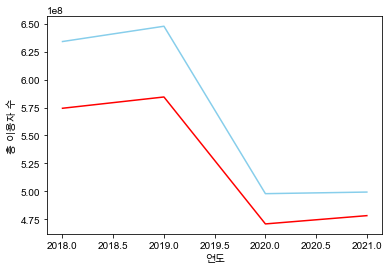

In [14]:
sns.lineplot(data=df_year_total1, x='연도', y='총 이용자 수', color='red')
sns.lineplot(data=df_year_total2, x='연도', y='총 이용자 수', color='skyblue')
plt.xticks
plt.show()
# 연도 날짜형으로 바꾸기
# y축 억명으로

<Figure size 2160x360 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 [Text(0, 0, '201801'),
  Text(1, 0, '201802'),
  Text(2, 0, '201803'),
  Text(3, 0, '201804'),
  Text(4, 0, '201805'),
  Text(5, 0, '201806'),
  Text(6, 0, '201807'),
  Text(7, 0, '201808'),
  Text(8, 0, '201809'),
  Text(9, 0, '201810'),
  Text(10, 0, '201811'),
  Text(11, 0, '201812'),
  Text(12, 0, '201901'),
  Text(13, 0, '201902'),
  Text(14, 0, '201903'),
  Text(15, 0, '201904'),
  Text(16, 0, '201905'),
  Text(17, 0, '201906'),
  Text(18, 0, '201907'),
  Text(19, 0, '201908'),
  Text(20, 0, '201909'),
  Text(21, 0, '201910'),
  Text(22, 0, '201911'),
  Text(23, 0, '201912'),
  Text(24, 0, '202001'),
  Text(25, 0, '202002'),
  Text(26, 0, '202003'),
  Text(27, 0, '202004'),
  Text(28, 0, '202005'),
  Text(29, 0, '202006'),
  Text(30, 0, '202007'),
  Text(31, 0, '20

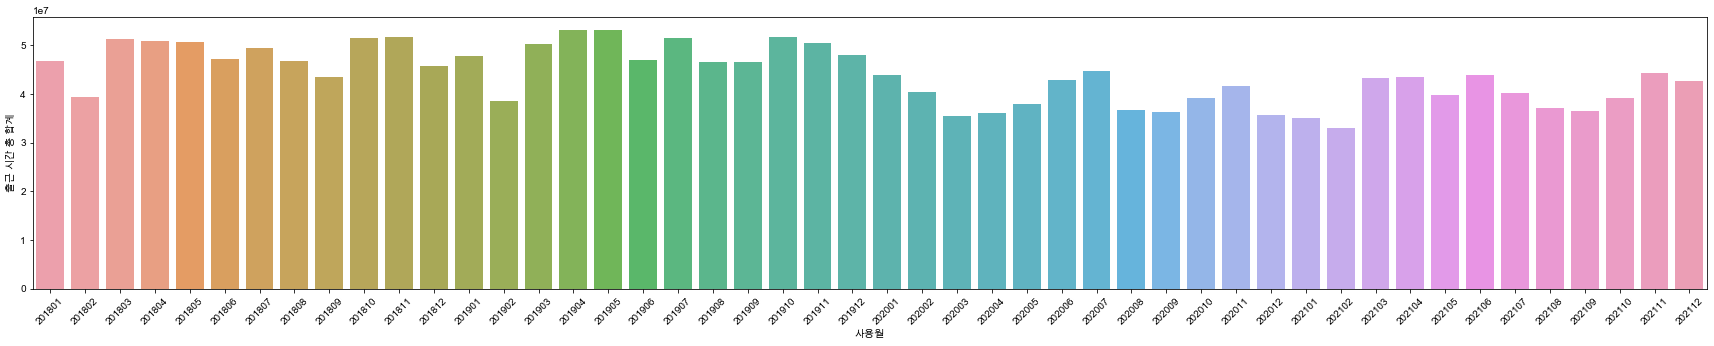

In [15]:
# 월에 따른 출근 시간 총 합계 시각화
plt.figure(figsize=(30, 5))
group_sum=sns.barplot(
    data= df_group_sum,
    x= "사용월",
    y= "출근 시간 총 합계", alpha = 0.9
)
plt.xticks(rotation=45)

plt.show()

<Figure size 2160x360 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 [Text(0, 0, '201801'),
  Text(1, 0, '201802'),
  Text(2, 0, '201803'),
  Text(3, 0, '201804'),
  Text(4, 0, '201805'),
  Text(5, 0, '201806'),
  Text(6, 0, '201807'),
  Text(7, 0, '201808'),
  Text(8, 0, '201809'),
  Text(9, 0, '201810'),
  Text(10, 0, '201811'),
  Text(11, 0, '201812'),
  Text(12, 0, '201901'),
  Text(13, 0, '201902'),
  Text(14, 0, '201903'),
  Text(15, 0, '201904'),
  Text(16, 0, '201905'),
  Text(17, 0, '201906'),
  Text(18, 0, '201907'),
  Text(19, 0, '201908'),
  Text(20, 0, '201909'),
  Text(21, 0, '201910'),
  Text(22, 0, '201911'),
  Text(23, 0, '201912'),
  Text(24, 0, '202001'),
  Text(25, 0, '202002'),
  Text(26, 0, '202003'),
  Text(27, 0, '202004'),
  Text(28, 0, '202005'),
  Text(29, 0, '202006'),
  Text(30, 0, '202007'),
  Text(31, 0, '20

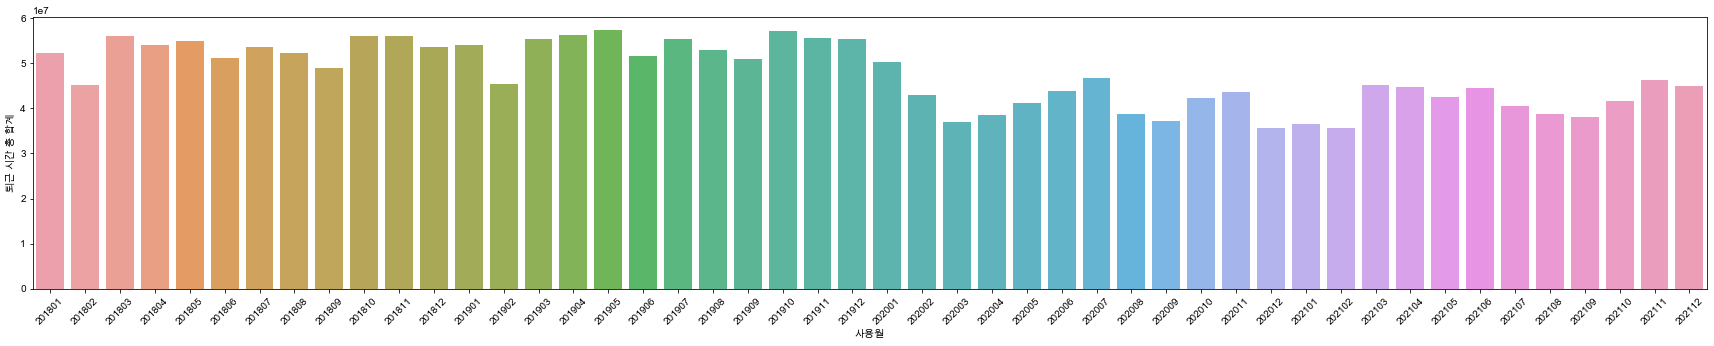

In [16]:
# 월에 따른 퇴근 시간 총 합계 시각화
plt.figure(figsize=(30, 5))
group_sum=sns.barplot(
    data= df_group_sum,
    x= "사용월",
    y= "퇴근 시간 총 합계", alpha = 0.9
)
plt.xticks(rotation=45)
plt.show()

In [17]:
#2018년 출근,퇴근이용자 수 상위 25프로인 역만 추출 = 90858,109942
a=df_2018['출근 시간 총 합계'].quantile(q=0.75, interpolation='nearest')
b=df_2018['퇴근 시간 총 합계'].quantile(q=0.75, interpolation='nearest')
a,b

(90858, 109942)

In [18]:
df_2018_quant=df_2018[(df_2018['출근 시간 총 합계']>=a) & (df_2018['퇴근 시간 총 합계']>=b)]
df_2018_quant

,Unnamed: 0,사용월,호선명,지하철역,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,17시-18시 승차인원,18시-19시 승차인원,19시-20시 승차인원,lat,lng,출근 시간 총 합계,퇴근 시간 총 합계
2,2,201812,01호선,서울,96780,212724,157731,169677,232724,137205,37.554648,126.972559,467235,539606
3,3,201812,01호선,시청,62827,182997,86988,83234,154545,77485,37.564718,126.977108,332812,315264
4,4,201812,01호선,신설동,25436,68570,39791,44388,68081,30156,37.575297,127.025087,133797,142625
5,5,201812,01호선,제기동,18141,45222,38870,56678,48982,25885,37.578103,127.034893,102233,131545
6,6,201812,01호선,종각,86427,252312,152987,135072,227792,127838,37.570161,126.982923,491726,490702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,6994,201801,분당선,야탑,37215,100855,59272,67506,96969,56682,37.411185,127.128715,197342,221157
6998,6998,201801,분당선,정자,24400,72427,51728,39655,63501,41269,37.367060,127.108105,148555,144425
7002,7002,201801,분당선,한티,18290,50849,55412,43705,49772,32101,37.496237,127.052873,124551,125578
7023,7023,201801,04호선,안산,60265,45759,17346,51405,64937,35724,37.327082,126.788532,123370,152066


In [19]:
df_2018_출근=df_2018_quant[["사용월","지하철역",'lat','lng',"출근 시간 총 합계","퇴근 시간 총 합계"]].sort_values(by="출근 시간 총 합계", ascending=False)
df_2018_출근
df_2018_출근.to_csv('df_2018_출근.csv')

,사용월,지하철역,lat,lng,출근 시간 총 합계,퇴근 시간 총 합계
2970,201807,강남,37.497175,127.027926,1015764,1031344
6501,201801,강남,37.497175,127.027926,970019,1022435
2379,201808,강남,37.497175,127.027926,941062,986292
5325,201803,강남,37.497175,127.027926,935391,962819
4735,201804,강남,37.497175,127.027926,923356,927723
...,...,...,...,...,...,...
6697,201801,합정,37.549463,126.913739,91050,127034
3305,201807,안양,37.401592,126.922874,90979,126023
614,201811,구의,37.537077,127.085916,90976,119343
5953,201802,이대,37.556733,126.946013,90959,128663


In [20]:
df_2018_퇴근=df_2018_quant[["사용월","지하철역",'lat','lng',"출근 시간 총 합계","퇴근 시간 총 합계"]].sort_values(by="퇴근 시간 총 합계", ascending=False)
df_2018_퇴근
df_2018_퇴근.to_csv('df_2018_퇴근.csv')

,사용월,지하철역,lat,lng,출근 시간 총 합계,퇴근 시간 총 합계
2970,201807,강남,37.497175,127.027926,1015764,1031344
6501,201801,강남,37.497175,127.027926,970019,1022435
2379,201808,강남,37.497175,127.027926,941062,986292
5325,201803,강남,37.497175,127.027926,935391,962819
609,201811,강남,37.497175,127.027926,911698,956417
...,...,...,...,...,...,...
2255,201809,정부과천청사,37.426513,126.989780,112172,110246
716,201811,한성대입구,37.588458,127.006221,103708,110206
1436,201810,이수,37.486263,126.981989,98212,110101
4191,201805,충정로,37.559973,126.963672,134985,110099


<Figure size 2160x360 with 0 Axes>

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131]),
 [Text(0, 0, '강남'),
  Text(1, 0, '삼성'),
  Text(2, 0, '역삼'),
  Text(3, 0, '가산디지털단지'),
  Text(4, 0, '선릉'),
  Text(5, 0, '을지로입구'),
  Text(6, 0, '광화문'),
  Text(7, 0, '종각'),
  Text(8, 0, '구로디지털단지'),
  Text(9, 0, '양재'),
  Text(10, 0, '잠실'),
  Text(11, 0, '

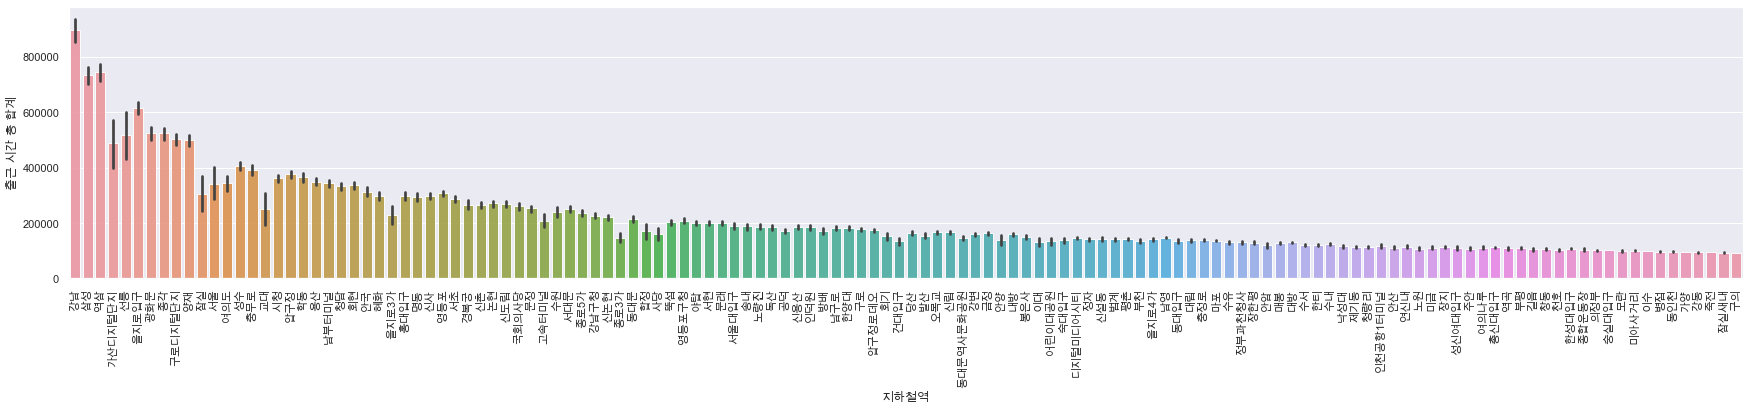

In [64]:
#2018년 상위 25프로 역의 달 평균 이용승객(출근 시간)
plt.figure(figsize=(30, 5))
group_sum=sns.barplot(
    data= df_2018_출근,
    x= "지하철역",
    y= "출근 시간 총 합계", alpha = 0.9
)
plt.xticks(rotation=90)
plt.show()

#누적막대로 

<Figure size 2160x360 with 0 Axes>

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131]),
 [Text(0, 0, '강남'),
  Text(1, 0, '삼성'),
  Text(2, 0, '잠실'),
  Text(3, 0, '선릉'),
  Text(4, 0, '가산디지털단지'),
  Text(5, 0, '역삼'),
  Text(6, 0, '홍대입구'),
  Text(7, 0, '을지로입구'),
  Text(8, 0, '서울'),
  Text(9, 0, '고속터미널'),
  Text(10, 0, '구로디지털단지'),
  Text(11, 

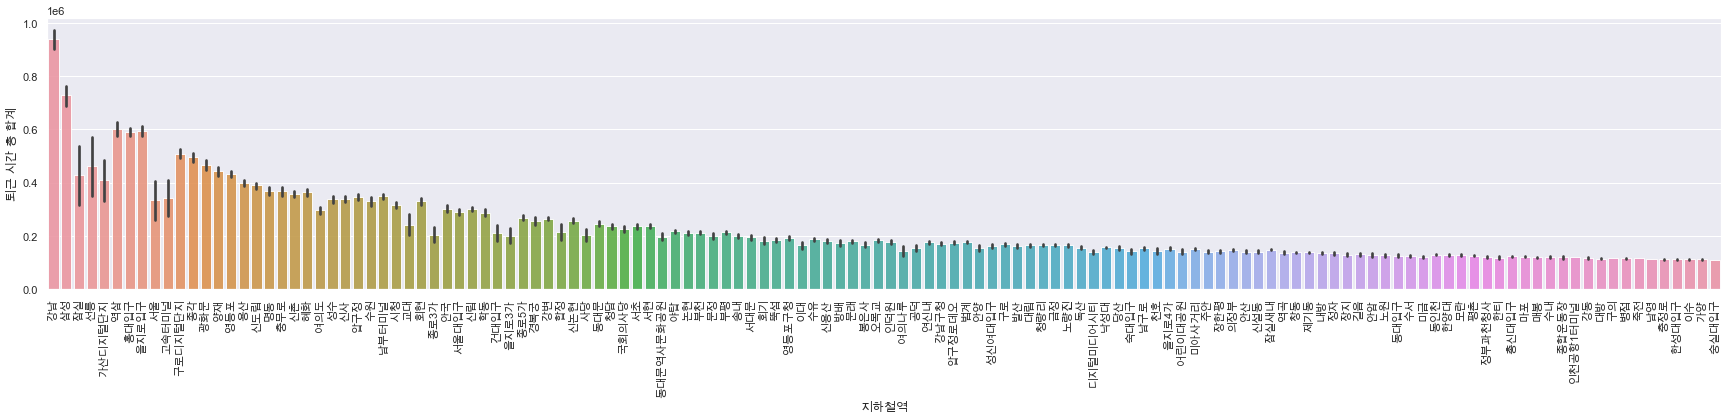

In [65]:
#2018년 상위 25프로 역의 달 평균 이용승객(퇴근 시간)
plt.figure(figsize=(30, 5))
group_sum=sns.barplot(
    data= df_2018_퇴근,
    x= "지하철역",
    y= "퇴근 시간 총 합계", alpha = 0.9
)
plt.xticks(rotation=90)
plt.show()

In [20]:
#2021년 출근,퇴근 상위 25프로인 역만 추출 = 72561, 81689
a=df_2021['출근 시간 총 합계'].quantile(q=0.75, interpolation='nearest')
b=df_2021['퇴근 시간 총 합계'].quantile(q=0.75, interpolation='nearest')
a,b

(72561, 81689)

In [21]:
df_2021_quant=df_2021[(df_2021['출근 시간 총 합계']>=72561) & (df_2021['퇴근 시간 총 합계']>=81689)].sort_values(by="출근 시간 총 합계",ascending=False)
df_2021_quant

,사용월,호선명,지하철역,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,17시-18시 승차인원,18시-19시 승차인원,19시-20시 승차인원,lat,lng,출근 시간 총 합계,퇴근 시간 총 합계
26928,202103,02호선,강남,153487,325012,320265,225786,339281,215342,37.497175,127.027926,798764,780409
26320,202104,02호선,강남,151261,321542,311718,222349,335143,203119,37.497175,127.027926,784521,760611
25104,202106,02호선,강남,150575,319617,310538,228834,333597,202589,37.497175,127.027926,780730,765020
22098,202111,02호선,역삼,124348,332036,307189,192363,287726,147879,37.500622,127.036456,763573,627968
22065,202111,02호선,강남,134376,310431,318239,239827,332029,202805,37.497175,127.027926,763046,774661
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24274,202108,경원선,의정부,12744,32473,27802,32944,36821,23035,NaN,NaN,73019,92800
22875,202110,06호선,한강진,16324,32057,24589,29070,34018,21558,37.539631,127.001725,72970,84646
22772,202110,04호선,성신여대입구,15449,32539,24917,38952,43022,26353,37.592624,127.016403,72905,108327
22679,202110,02호선,구의,14821,36289,21733,32193,40162,19329,37.537077,127.085916,72843,91684


In [22]:
df_2021_quant=df_2021[(df_2021['출근 시간 총 합계']>=72561) & (df_2021['퇴근 시간 총 합계']>=81689)].sort_values(by="퇴근 시간 총 합계",ascending=False)
df_2021_quant

,사용월,호선명,지하철역,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,17시-18시 승차인원,18시-19시 승차인원,19시-20시 승차인원,lat,lng,출근 시간 총 합계,퇴근 시간 총 합계
26928,202103,02호선,강남,153487,325012,320265,225786,339281,215342,37.497175,127.027926,798764,780409
22065,202111,02호선,강남,134376,310431,318239,239827,332029,202805,37.497175,127.027926,763046,774661
25104,202106,02호선,강남,150575,319617,310538,228834,333597,202589,37.497175,127.027926,780730,765020
26320,202104,02호선,강남,151261,321542,311718,222349,335143,203119,37.497175,127.027926,784521,760611
21456,202112,02호선,강남,126547,302135,306306,240715,319852,199355,37.497175,127.027926,734988,759922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26375,202104,03호선,구파발,23604,28833,25218,34787,29144,18023,37.636763,126.918821,77655,81954
26344,202104,02호선,신당,17797,36414,22249,27688,33194,20935,37.565972,127.017820,76460,81817
21645,202112,06호선,안암,15116,33922,30415,37874,28623,15284,37.586272,127.029005,79453,81781
25305,202106,06호선,한강진,19009,35317,27053,28377,31446,21903,37.539631,127.001725,81379,81726


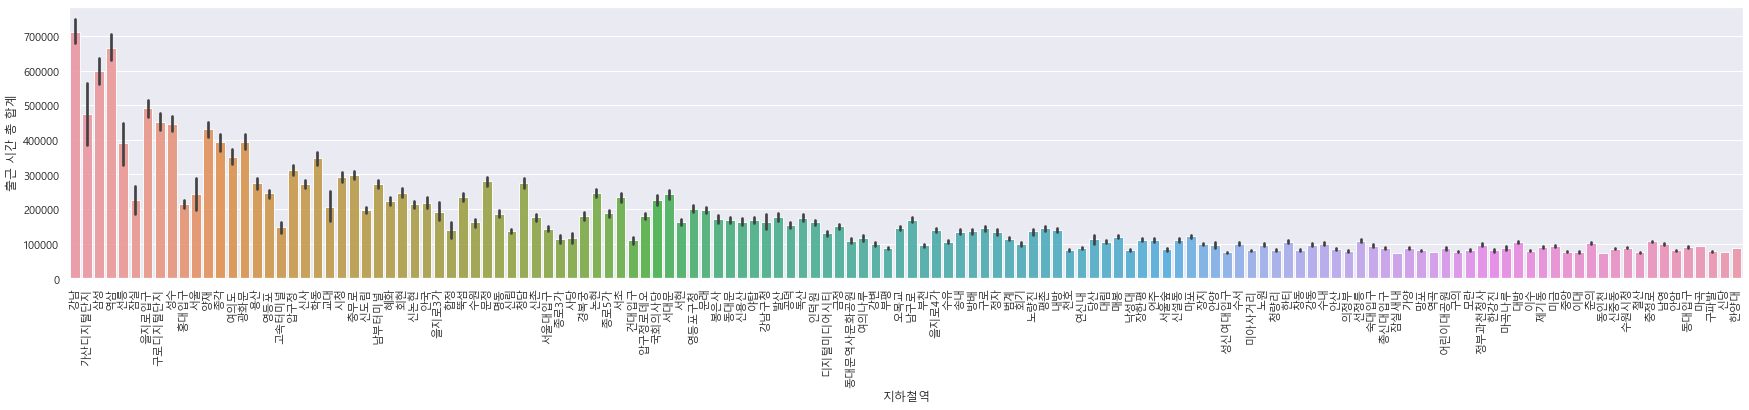

In [23]:
#2021년 출근시간대 이용자 수 기준 상위 25프로 역의 달 평균 이용승객(출근 시간)
plt.figure(figsize=(30, 5))
group_sum=sns.barplot(
    data= df_2021_quant,
    x= "지하철역",
    y= "출근 시간 총 합계", alpha = 0.9
)
plt.xticks(rotation=90)
plt.show()

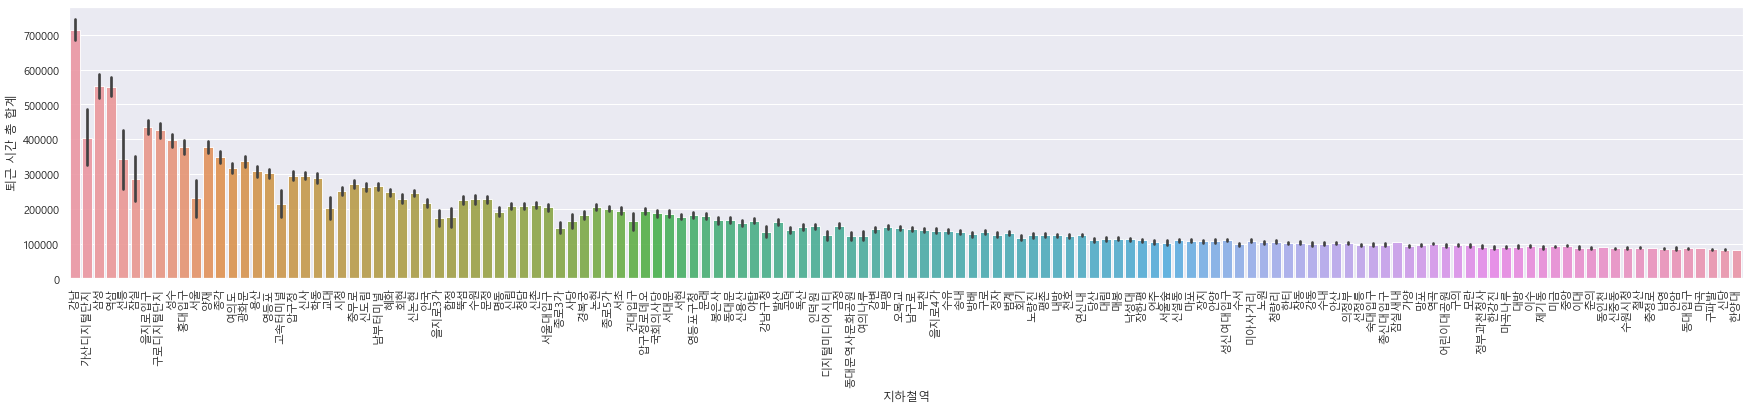

In [24]:
#2021년 퇴근시간대 이용자 수 기준 상위 25프로 역의 달 평균 이용승객(퇴근 시간)
plt.figure(figsize=(30, 5))
group_sum=sns.barplot(
    data= df_2021_quant,
    x= "지하철역",
    y= "퇴근 시간 총 합계", alpha = 0.9
)
plt.xticks(rotation=90)
plt.show()

오피스 근처로 집을 구하는 빈도